In [399]:
"""----------------------
Classification of Heart Dataset

By: Daniel Cwynar

Link to data:
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

----------------------"""
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


heart = pd.read_csv("heart.csv")

heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [400]:
heart.info(), heart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
               age         sex          cp      trtbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg    thalachh        exng     oldpeak         slp         caa  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std   

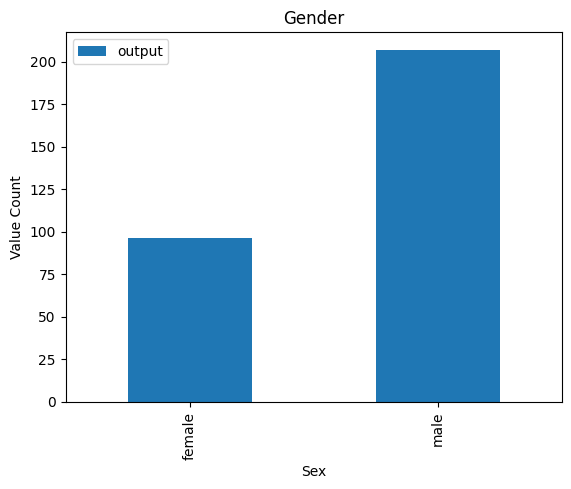

In [401]:
heart_gender_temp = heart.loc[:, ["sex", "output"]]

heart_gender_temp["sex"] = heart_gender_temp["sex"].map({0:"female", 1:"male"})

heart_gender_temp.groupby("sex").count().plot.bar()

plt.title("Gender")
plt.xlabel("Sex")
plt.ylabel("Value Count")
plt.show()

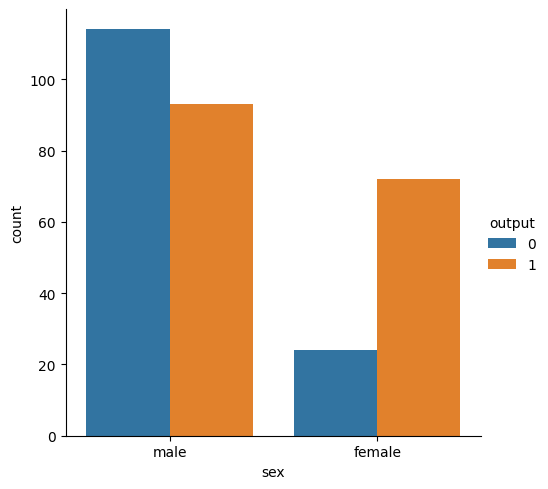

In [402]:
sns.catplot(x = "sex", hue = "output", kind = "count", data = heart_gender_temp)

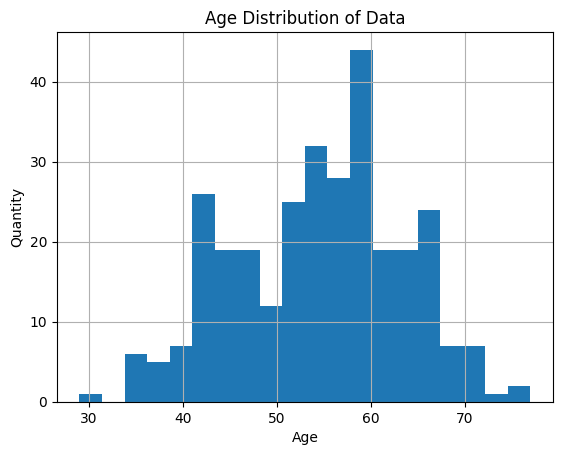

In [403]:
heart.age.hist(bins = 20)

plt.title("Age Distribution of Data")
plt.xlabel("Age")
plt.ylabel("Quantity")
plt.show()

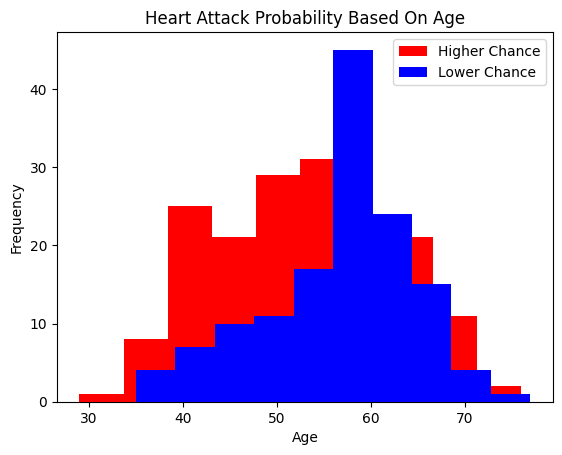

In [404]:
heart.loc[heart["output"] == 1]["age"].plot.hist(color = "red", label = "Higher Chance")
heart.loc[heart["output"] == 0]["age"].plot.hist(color = "blue", label = "Lower Chance")

plt.title("Heart Attack Probability Based On Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [405]:
x = heart[heart.columns[:-1]].values
y = heart[heart.columns[-1]].values


x.shape,y.shape

((303, 13), (303,))

In [406]:
x_scaled = StandardScaler().fit_transform(x)
df = np.hstack((x_scaled,np.reshape(y, (-1,1))))
df = pd.DataFrame(df,columns = heart.columns)
df_features = df
df_label = df_features.pop("output")

df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [407]:
train, test, train_y, test_y = train_test_split(df_features,df_label, test_size= .2)

# train is and test are features
# train_y and test_y are labels
# train -> train_y
#test -> test_y

In [408]:
heart_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation = "relu"),
    tf.keras.layers.Dense(12, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

heart_model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate= .001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = heart_model.fit(train,train_y, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.6881 - accuracy: 0.6322
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.6570
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.6612
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.6777
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.6901
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7025
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.7231
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7397
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5098 - accuracy: 0.7397
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7438
Epoch 11/100
8/8 [===========

In [409]:
heart_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 12)                168       
                                                                 
 dense_70 (Dense)            (None, 12)                156       
                                                                 
 dense_71 (Dense)            (None, 1)                 13        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


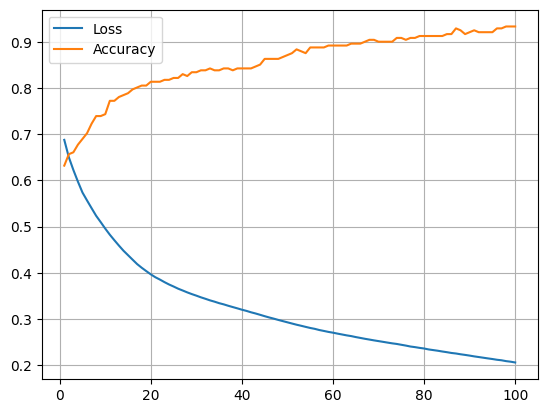

In [410]:
plt.plot(np.arange(1,101), history.history["loss"], label = "Loss")

plt.plot(np.arange(1,101), history.history["accuracy"], label = "Accuracy")

plt.grid(True)

plt.legend()

In [411]:
heart_model.evaluate(test,test_y)

2/2 [==============================] - 0s 5ms/step - loss: 0.7082 - accuracy: 0.8033


[0.7081833481788635, 0.8032786846160889]

In [412]:
#Gets the first 10 values from the test dataset and use the model to predict values
#then compares the actual values to the predictions

prediction = heart_model.predict(test[:10])

actual = test_y[:10]

prediction_l = []

print("\nPredicted output: ")
for i in prediction:
    rounded = np.round(i)
    prediction_l.append(rounded)

prediction_l = np.array(prediction_l)
prediction_l = np.reshape(prediction_l,(-1,1))

actual_l = np.array(actual)
actual_l = np.reshape(actual_l, (-1,1))

outcome = (prediction_l == actual_l)

pred_df = np.column_stack((actual_l,prediction_l))
pred_df = np.column_stack((pred_df,outcome))
pred_df = pd.DataFrame(pred_df,columns = ["Actual", "Prediction", "Outcome"])
pred_df["Outcome"] = pred_df["Outcome"].map({1 : "Pass", 0 : "Fail"})

pred_df

1/1 [==============================] - 0s 58ms/step

Predicted output: 


C:\Users\dcwyn\AppData\Local\Temp\ipykernel_6220\1323987631.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  actual = test_y[:10]


,Actual,Prediction,Outcome
0,0.0,0.0,Pass
1,0.0,0.0,Pass
2,1.0,0.0,Fail
3,1.0,1.0,Pass
4,0.0,1.0,Fail
5,1.0,0.0,Fail
6,0.0,0.0,Pass
7,0.0,0.0,Pass
8,1.0,1.0,Pass
9,0.0,0.0,Pass


In [413]:
# User Inputted Predictions

input_list = []

input_list.append(int(input("Age: ")))
input_list.append(int(input("Sex (0 = female, 1 = male): ")))
input_list.append(int(input("Chest pain type (0-3): ")))
input_list.append(int(input("Resting blood pressure (mmhg): ")))
input_list.append(int(input("Cholestoral level (mg): ")))
input_list.append(int(input("Fasting blood sugar > 120: (0 = no, 1 = yes): ")))
input_list.append(int(input("Resting electrocardiographic results (1-2): ")))
input_list.append(int(input("Max heart rate: ")))
input_list.append(int(input("Exercise induced angina (0 = no, 1 = yes): ")))
input_list.append(float(input("Old peak: ")))
input_list.append(int(input("Slope (0-2): ")))
input_list.append(int(input("Number of major vessels (0-3): ")))
input_list.append(int(input("Thal rate (0-3): ")))


### TESTING INPUT DATA ###
#63	1	0	140	187	0	0	144	1	4	2	2	3       should be 0 

#56	1	0	125	249	1	0	144	1	1.2	1	1	2       should be 0 

#64	1	0	128	263	0	1	105	1	0.2	1	1	3       should be 1 

#46	0	0	138	243	0	0	152	1	0	1	0	2       should be 1 


input_list = np.array(input_list)
input_list = np.expand_dims(input_list, axis = 0)
feed = np.append(x, input_list, axis = 0)
feed = StandardScaler().fit_transform(feed)
feed = np.expand_dims(feed[-1], axis = 0)



pq = heart_model.predict(feed)

pq_rounded = np.round(pq)

res =  pq_rounded[0,0]

print("\nThe model predicted:", res, "\n")

out = "The patient has a higher chance of heart attack" if res == 1 else "The patient has a lower chance of heart attack"
print(out)

print(pq[0,0], "This is how close it is to 0 or 1 (displays how certain it is)")
print("\nIf it is close to .5 the model is less certain, and .9 or .0 are more certain") 

1/1 [==============================] - 0s 60ms/step

The model predicted: 0.0 

The patient has a lower chance of heart attack
0.0018869119 This is how close it is to 0 or 1 (displays how certain it is)

If it is close to .5 the model is less certain, and .9 or .0 are more certain
